# Data wrangling WeRateDogs



### Approach
- Gathering 3 datasets
- Assessing data for quality and tidiness issues
- Cleaning data for all issues 
- 3 Insights & visualization

### Introduction
This project will be analyzing tweet archive of Twitter user @dog_Rates (A.K.A. WeRateDogs) that rates and comments on people's dogs. Data gathers from real world always isn't clean. Python libraries are used to gather, assess and clean its quality/tidyness.


### Datasets
- Twitter_archive_enhanced: Provides each tweet that includes dog name, dog score and dog stage. This link of this Data is provided to download manually.

- Tweet image predictions data (what breed of dogs): Classify each tweet's dog breeds according to a neural network. This file (image_predictions.tsv) can be downloaded programmatically from Udacity's servers using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

- Twitter API & JSON: Include retweet count and favorite count will be gathered using Tweepy to query Twitter's API for additional data beyond the data included in the WeRateDogs Twitter archive. 
 


### Import Libraries

In [1]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests
import tweepy 
import json

## 1. Gather 

In [2]:
#Read the given twitter_archive file 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#Download the image predictions file programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [4]:
#Set up tweet API 
consumer_key = 'jqSdAMopA1pKWrqItbSyHn6jG'
consumer_secret = 'IkpShUBp2iSf6VzarhiEB5sD1qXI7Qh0heVdmDrd6Ll9VIUMCf'
access_token = '224699529-15Y9N0bDNTsMmT3xSDQao6M7wIpmdY28Jrv5PaOY'
access_secret = 'NqL90U93Ohl8dCvAbhbCWO9h9BdXsUZCS09lEC7emYopR'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
# Use Twitter API to collect status data 
tweet_ids = list(twitter_archive['tweet_id'])

tweet_data = []
tweet_id_success = []
tweet_id_missing = []
for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, 
                              tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        tweet_id_success.append(tweet_id)
    except:
        tweet_id_missing.append(tweet_id)
        print(tweet_id)

888202515573088257
873697596434513921
872668790621863937
869988702071779329
866816280283807744
861769973181624320
845459076796616705
842892208864923648
837012587749474308
827228250799742977
812747805718642688
802247111496568832
775096608509886464
770743923962707968
Rate limit reached. Sleeping for: 736
754011816964026368
680055455951884288
Rate limit reached. Sleeping for: 735


In [6]:
# Write tweet data to json file
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweet_data, file)

In [7]:
# Load the Twitter API data
tweet_api = pd.read_json('tweet_json.txt')
tweet_api['tweet_id'] = tweet_id_success
tweet_api = tweet_api[['tweet_id', 'favorite_count', 'retweet_count']]

tweet_api.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,38100,8330
1,892177421306343426,32690,6154
2,891815181378084864,24602,4073
3,891689557279858688,41456,8474
4,891327558926688256,39627,9168


## 2. Assess 

In [8]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
324,834086379323871233,NaN,NaN,2017-02-21 17:04:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lipton. He's a West Romanian Snuggle P...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834086379...,12,10,Lipton,None,None,None,None
1744,679158373988876288,NaN,NaN,2015-12-22 04:35:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rubio. He has too much skin. 11/10 htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679158373...,11,10,Rubio,None,None,None,None
1343,704761120771465216,NaN,NaN,2016-03-01 20:11:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper killed this great white in an epic...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704761120...,13,10,None,None,None,pupper,None
1735,679729593985699840,NaN,NaN,2015-12-23 18:25:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hunter. He was playing with his ball m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679729593...,8,10,Hunter,None,None,None,None
212,851861385021730816,NaN,NaN,2017-04-11 18:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @eddie_coe98: Thanks @dog_rates completed m...,8.482894e+17,341021133.0,2017-04-01 21:42:03 +0000,https://twitter.com/eddie_coe98/status/8482893...,10,10,None,None,None,None,None


In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [11]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
511,676191832485810177,https://pbs.twimg.com/media/CWJQ4UmWoAIJ29t.jpg,2,Chihuahua,0.376741,True,Italian_greyhound,0.173114,True,muzzle,0.071485,False
927,702671118226825216,https://pbs.twimg.com/media/CcBjp2nWoAA8w-2.jpg,1,bloodhound,0.381227,True,Sussex_spaniel,0.212017,True,clumber,0.128622,True
1389,766423258543644672,https://pbs.twimg.com/media/CqLh4yJWcAAHomv.jpg,2,keeshond,0.995823,True,Pomeranian,0.003897,True,Norwegian_elkhound,0.000253,True
35,666437273139982337,https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg,1,Chihuahua,0.671853,True,beagle,0.124680,True,Saluki,0.044094,True
245,670468609693655041,https://pbs.twimg.com/media/CU37pEoWUAAitje.jpg,1,minivan,0.730152,False,beach_wagon,0.078661,False,car_wheel,0.064346,False


In [13]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
sum(image_prediction['tweet_id'].duplicated())

0

In [15]:
image_prediction['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
web_site                      19
Cardigan                      19
teddy                         18
Eskimo_dog                    18
beagle                        18
Maltese_dog                   18
Shetland_sheepdog             18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [16]:
image_prediction['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Pembroke                           27
collie                             27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
malinois                           20
Samoyed                            20
toy_terrier                        20
chow                               20
miniature_pinscher                 20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [17]:
tweet_api.sample(5)

,tweet_id,favorite_count,retweet_count
2150,669363888236994561,635,236
784,773191612633579521,10633,4475
397,823699002998870016,13363,2632
2199,668542336805281792,470,222
1816,676191832485810177,2360,1083


In [18]:
tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
favorite_count    2340 non-null int64
retweet_count     2340 non-null int64
dtypes: int64(3)
memory usage: 73.1 KB


In [19]:
sum(tweet_api['tweet_id'].duplicated())

0

In [20]:
tweet_api.sort_values(['favorite_count'], ascending=False)   

,tweet_id,favorite_count,retweet_count
1024,744234799360020481,164538,83808
403,822872901745569793,140645,47775
523,807106840509214720,127249,61071
130,866450705531457537,122114,35495
1064,739238157791694849,121560,62071
65,879415818425184262,104172,43499
439,819004803107983360,92087,40108
163,859196978902773760,90842,30843
1750,678399652199309312,82482,33850
112,870374049280663552,82049,26136


## Assessment Summary


### Quality Issues

   - Tweets that are retweeted because theses tweets are not original.
   - Tweets that has no image
   - Fix tweets contains inconsistent capitalization on predicted dog names.
   - Incorrected datatypes on tweet-id and timestamp.
   - None and inaccurate strings found in name column.
   - Incorrected ratings on rating_numerator and rating_denominator.
   - High ratings found that do not make sense.
   - Rating_numberator and rating_denominator can be converted into one column
   


  
   
### Tidiness Issues
   - All three files have common tweet_id column, which can be used to join all three files as one dataframe.
   - 4 different columns (doggo, floofer, pupper, and puppo) on dog stages should be combine in only one column.
   - Drop unnecessary columns that are not useful for analysis.



## 3. Clean 

In [21]:
# Make copies for cleaning to keep original files untouched
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_api_clean = tweet_api.copy()

### Tidiness Issue 1 - Combine all three dataframes

### Define: 
Twitter_archieve, image_prediction and tweet_api should all be combine. All three dfs refers to same tweet_id.

### Code:

In [22]:
# Merge all three dfs on tweet_id 

df_merge = pd.merge(twitter_archive_clean, image_prediction_clean,on='tweet_id', how='inner')
df_merge = pd.merge(df_merge, tweet_api_clean,on='tweet_id', how='inner')

### Test:

In [23]:
df_merge.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,38100,8330
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,32690,6154


In [24]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 30 columns):
tweet_id                      2067 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
doggo                         2067 non-null object
floofer                       2067 non-null object
pupper                        2067 non-null object
puppo                         2067 non-null object
jpg_url                       2067 

### Tidiness Issue 2 - Create one column for dog stages

### Define: 
4 different columns (doggo, floofer, pupper, and puppo) should be combine in only one column.

### Code:

In [25]:
# Extract doggo, floofer, pupper and puppo columns into new 'dog_stage' column 
df_merge['dog_stage'] = df_merge['text'].str.extract('(doggo|floofer|pupper|puppo)')



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [26]:
# Drop doggo, floofer, pupper, and puppo columns
df_merge = df_merge.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

### Test:

In [27]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 27 columns):
tweet_id                      2067 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
jpg_url                       2067 non-null object
img_num                       2067 non-null int64
p1                            2067 non-null object
p1_conf                       2067 non-null float64
p1_dog                        2067 

### Tidiness issue 3 - drop unnessary columns 
### Define: 
'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' in twitter_archive file. These columns are not useful and contain most null values. 'retweeted_status_id' will be dropped in next issue.

### Code:

In [28]:
df_merge = df_merge.drop(['retweeted_status_user_id', 
                        'retweeted_status_timestamp',
                          'in_reply_to_status_id',
                          'in_reply_to_user_id',], axis=1)

### Test:

In [29]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 23 columns):
tweet_id               2067 non-null int64
timestamp              2067 non-null object
source                 2067 non-null object
text                   2067 non-null object
retweeted_status_id    75 non-null float64
expanded_urls          2067 non-null object
rating_numerator       2067 non-null int64
rating_denominator     2067 non-null int64
name                   2067 non-null object
jpg_url                2067 non-null object
img_num                2067 non-null int64
p1                     2067 non-null object
p1_conf                2067 non-null float64
p1_dog                 2067 non-null bool
p2                     2067 non-null object
p2_conf                2067 non-null float64
p2_dog                 2067 non-null bool
p3                     2067 non-null object
p3_conf                2067 non-null float64
p3_dog                 2067 non-null bool
favorite_count       

### Quality issue 1 - Remove tweets that are retweeted because these tweets are not orginal
### Define: 
Remove retweets to avoid analysizing same infomations.

### Code:

In [30]:
#remove retweets that could be occured repeatly as another tweets
df_merge.drop(df_merge[df_merge['retweeted_status_id'].notnull()==True].index, inplace=True)

#Drop 'retweeted_status_id' column because it is not useful
df_merge = df_merge.drop(['retweeted_status_id'], axis=1)

### Test:

In [31]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2066
Data columns (total 22 columns):
tweet_id              1992 non-null int64
timestamp             1992 non-null object
source                1992 non-null object
text                  1992 non-null object
expanded_urls         1992 non-null object
rating_numerator      1992 non-null int64
rating_denominator    1992 non-null int64
name                  1992 non-null object
jpg_url               1992 non-null object
img_num               1992 non-null int64
p1                    1992 non-null object
p1_conf               1992 non-null float64
p1_dog                1992 non-null bool
p2                    1992 non-null object
p2_conf               1992 non-null float64
p2_dog                1992 non-null bool
p3                    1992 non-null object
p3_conf               1992 non-null float64
p3_dog                1992 non-null bool
favorite_count        1992 non-null int64
retweet_count         1992 non-null int64

### Quality issue 2 - Tweets that has no image
### Define: 
Remove tweets that has no images.

### Code:

In [32]:
df_merge = df_merge.dropna(subset=['expanded_urls'])

### Test:

In [33]:
len(df_merge['expanded_urls'].isnull())

1992

### Quality issue 3 - Inconsistent capitalization on predicted dog names.
### Define: 
Some string in p1, p2 and p3 are captalizaed, and some are not.

### Code:

In [34]:

df_merge['p1'] = df_merge['p1'].str.lower()
df_merge['p2'] = df_merge['p2'].str.lower()
df_merge['p3'] = df_merge['p3'].str.lower()

### Test:

In [35]:
df_merge.head().sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,39627,9168,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,labrador_retriever,0.168086,True,spatula,0.040836,False,41456,8474,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,malamute,0.078253,True,kelpie,0.031379,True,24602,4073,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,pekinese,0.090647,True,papillon,0.068957,True,32690,6154,NaN
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,bagel,0.085851,False,banana,0.076110,False,38100,8330,NaN


### Quality issue 4 - Incorrected datatypes
### Define: 
1. 'tweet-id' should be conveted to str datatype
2. 'timestamp' should be converted to a datetime object

### Code:

In [36]:
#convert 'tweet_id' to str
df_merge['tweet_id'] = df_merge['tweet_id'].astype(str)

#remove time zone information and convert 'timestamp' to a datatime obeject
df_merge['timestamp'] = df_merge['timestamp'].str.slice(start=0, stop=-6)
df_merge['timestamp'] = pd.to_datetime(df_merge['timestamp'], format = "%Y-%m-%d %H:%M:%S")

### Test:

In [37]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2066
Data columns (total 22 columns):
tweet_id              1992 non-null object
timestamp             1992 non-null datetime64[ns]
source                1992 non-null object
text                  1992 non-null object
expanded_urls         1992 non-null object
rating_numerator      1992 non-null int64
rating_denominator    1992 non-null int64
name                  1992 non-null object
jpg_url               1992 non-null object
img_num               1992 non-null int64
p1                    1992 non-null object
p1_conf               1992 non-null float64
p1_dog                1992 non-null bool
p2                    1992 non-null object
p2_conf               1992 non-null float64
p2_dog                1992 non-null bool
p3                    1992 non-null object
p3_conf               1992 non-null float64
p3_dog                1992 non-null bool
favorite_count        1992 non-null int64
retweet_count         1992 non-n

### Quality issue 5 - None and inaccurate strings found in 'name' column 
### Define: 
1. Many "None" str were found, which should be changed to NaN.
2. Inaccurate str ("a", "an", "the", "very", "by", etc) found.

### Code:

In [38]:
lowercase_names = []
for row in df_merge['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not', 'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all', 'infuriating', 'the', 'actually', 'by', 'officially', 'light', 'space']


In [39]:
# Replace all names that start with a lowercase letter with NaN
df_merge['name'].replace(lowercase_names, 
                        np.nan,
                       inplace = True)

# Replace all 'None's with NaN
df_merge['name'].replace('None', 
                        np.nan,
                       inplace = True)

### Test:

In [40]:
df_merge['name'].value_counts()

Cooper          10
Lucy            10
Oliver          10
Charlie         10
Penny            9
Tucker           9
Sadie            8
Winston          8
Lola             7
Toby             7
Daisy            7
Stanley          6
Bella            6
Koda             6
Bo               6
Jax              6
Leo              5
Rusty            5
Dave             5
Scout            5
Buddy            5
Bailey           5
Louis            5
Milo             5
Chester          5
Oscar            5
Winnie           4
Scooter          4
Gary             4
Clarence         4
                ..
Clifford         1
Shikha           1
Autumn           1
Tanner           1
Bonaparte        1
Crawford         1
Cheryl           1
Edmund           1
Hall             1
Cheesy           1
Harper           1
Snickers         1
Juckson          1
Doobert          1
Akumi            1
Alejandro        1
Devón            1
Alf              1
Tove             1
O                1
Kathmandu        1
Tater       

### Quality issue 6 - Wrong rating should be fixed
### Define: 
Some rating_numerator values are much higher than the range. Also rating_denominator that are not equal to 10 should be fixed.

### Code:

In [41]:
#find ratings that are off
pd.set_option('display.max_colwidth', -1)
df_merge.loc[df_merge.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator']]



,tweet_id,text,rating_numerator,rating_denominator
341,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
411,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
730,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
871,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
919,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
962,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
996,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1017,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1042,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1060,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [42]:
#manually correct the values according to the right values in the text
df_merge.loc[df_merge.tweet_id=='740373189193256964',['rating_numerator','rating_denominator']]=[14,10]
df_merge.loc[df_merge.tweet_id=='722974582966214656',['rating_numerator','rating_denominator']]=[13,10]
df_merge.loc[df_merge.tweet_id=='716439118184652801',['rating_numerator','rating_denominator']]=[11,10]
df_merge.loc[df_merge.tweet_id=='682962037429899265',['rating_numerator','rating_denominator']]=[10,10]
df_merge.loc[df_merge.tweet_id=='666287406224695296',['rating_numerator','rating_denominator']]=[9,10]


In [43]:
df_merge.rating_denominator.value_counts()

10     1979
80     2   
50     2   
170    1   
150    1   
130    1   
120    1   
110    1   
90     1   
70     1   
40     1   
7      1   
Name: rating_denominator, dtype: int64

### Quality issue 7 - Rating outliers
### Define: 
Rating_numberator that are over 50 could be due to mistakes. removing the outliers to give more accurate data.

### Code:

In [44]:
#remove retweets
df_merge.drop(df_merge[df_merge['rating_denominator']>=50].index, inplace=True)



In [45]:
df_merge.rating_denominator.value_counts()

10    1979
40    1   
7     1   
Name: rating_denominator, dtype: int64

### Quality issue 8 -  Rating_numberator and rating_denominator can be converted into one column
### Define: 
Rating_numberator and rating_denominator can be converted to float because some values has decimals. Also, Create new rating column since denomintor is 10 for all tweets

### Code:

In [46]:
df_merge['rating_numerator'] = df_merge['rating_numerator'].astype(int)
df_merge['rating_denominator'] = df_merge['rating_denominator'].astype(float)

In [47]:
df_merge['rating'] = 10 * df_merge['rating_numerator'] / df_merge['rating_denominator']



### Test:

In [48]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 2066
Data columns (total 23 columns):
tweet_id              1981 non-null object
timestamp             1981 non-null datetime64[ns]
source                1981 non-null object
text                  1981 non-null object
expanded_urls         1981 non-null object
rating_numerator      1981 non-null int64
rating_denominator    1981 non-null float64
name                  1348 non-null object
jpg_url               1981 non-null object
img_num               1981 non-null int64
p1                    1981 non-null object
p1_conf               1981 non-null float64
p1_dog                1981 non-null bool
p2                    1981 non-null object
p2_conf               1981 non-null float64
p2_dog                1981 non-null bool
p3                    1981 non-null object
p3_conf               1981 non-null float64
p3_dog                1981 non-null bool
favorite_count        1981 non-null int64
retweet_count         1981 non

### Store Data:
Store cleaned DataFrame in a CSV file 

In [49]:
df_merge.to_csv('twitter_archive_master.csv', index=False)

### Analyze and Visualize Data

In [50]:
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10.0,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,bagel,0.085851,False,banana,0.076110,False,38100,8330,NaN,13.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,pekinese,0.090647,True,papillon,0.068957,True,32690,6154,NaN,13.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10.0,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,malamute,0.078253,True,kelpie,0.031379,True,24602,4073,NaN,12.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10.0,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,labrador_retriever,0.168086,True,spatula,0.040836,False,41456,8474,NaN,13.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10.0,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,39627,9168,NaN,12.0


In [51]:
df_master.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count,rating
count,1.981000e+03,1981.000000,1981.000000,1981.000000,1981.000000,1.981000e+03,1.981000e+03,1981.000000,1981.000000,1981.000000
mean,7.359830e+17,11.720848,10.013629,1.203433,0.593592,1.346838e-01,6.030555e-02,8770.843009,2663.861686,11.709382
std,6.760093e+16,40.807114,0.677425,0.561841,0.272164,1.007511e-01,5.099825e-02,12850.857662,4746.685221,40.802885
min,6.660209e+17,0.000000,7.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,80.000000,12.000000,0.000000
25%,6.757984e+17,10.000000,10.000000,1.000000,0.360465,5.413540e-02,1.610520e-02,1877.000000,591.000000,10.000000
50%,7.084699e+17,11.000000,10.000000,1.000000,0.587372,1.180890e-01,4.952370e-02,3970.000000,1275.000000,11.000000
75%,7.881506e+17,12.000000,10.000000,1.000000,0.845256,1.954050e-01,9.168510e-02,10955.000000,3049.000000,12.000000
max,8.924206e+17,1776.000000,40.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,164538.000000,83808.000000,1776.000000


In [52]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 23 columns):
tweet_id              1981 non-null int64
timestamp             1981 non-null object
source                1981 non-null object
text                  1981 non-null object
expanded_urls         1981 non-null object
rating_numerator      1981 non-null int64
rating_denominator    1981 non-null float64
name                  1348 non-null object
jpg_url               1981 non-null object
img_num               1981 non-null int64
p1                    1981 non-null object
p1_conf               1981 non-null float64
p1_dog                1981 non-null bool
p2                    1981 non-null object
p2_conf               1981 non-null float64
p2_dog                1981 non-null bool
p3                    1981 non-null object
p3_conf               1981 non-null float64
p3_dog                1981 non-null bool
favorite_count        1981 non-null int64
retweet_count         1981 non-null int

## Insight 1: Most favorated dog tweets
Sort the dataframe to see the top 3 tweets that received the most retweet_count. Then we can pull out the image urls.

In [53]:
df_master.sort_values(['favorite_count'], ascending =False ).head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage,rating
772,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13,10.0,NaN,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1,...,ice_bear,0.044681,False,whippet,0.018442,True,164538,83808,doggo,13.0
309,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13,10.0,NaN,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,...,labrador_retriever,0.160329,True,irish_terrier,0.069126,True,140645,47775,puppo,13.0
399,807106840509214720,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,https://twitter.com/dog_rates/status/807106840509214720/video/1,13,10.0,Stephan,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,...,pomeranian,0.120358,True,toy_terrier,0.077008,True,127249,61071,NaN,13.0


In [54]:
#Top 1 Most favorated dog
df_master[df_master['tweet_id']==744234799360020481].jpg_url

772    https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
Name: jpg_url, dtype: object

In [55]:
#Top 2 Most favorated dog
df_master[df_master['tweet_id']==822872901745569793].jpg_url

309    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
Name: jpg_url, dtype: object

In [56]:
#Top 3 Most favorated dog
df_master[df_master['tweet_id']==807106840509214720].jpg_url

399    https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg
Name: jpg_url, dtype: object

## Insight 2: Retweet Counts vs Favorite Counts
Create a visualization to compare retweet counts with favorite counts, then observe if there is any correlation between them.

Text(66.625,0.5,'Favorite Counts')

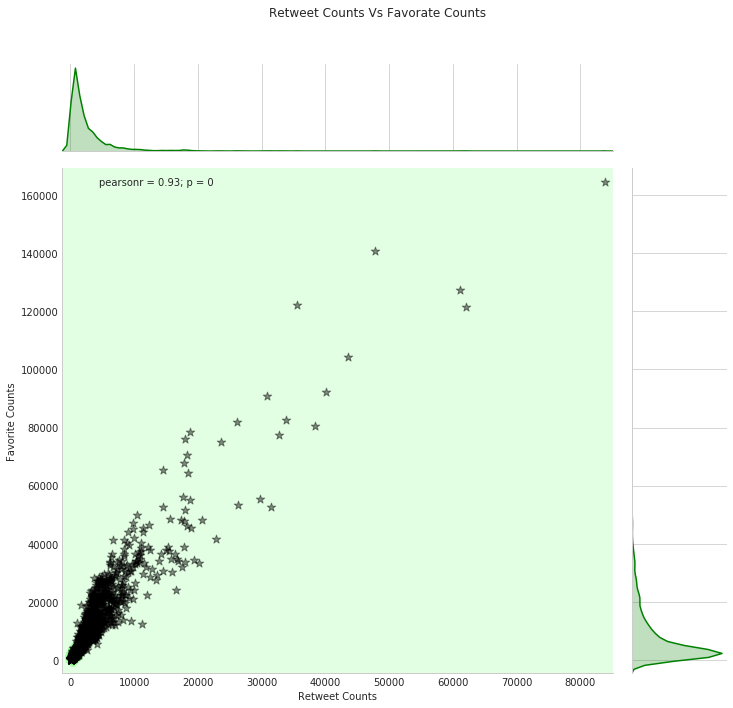

In [62]:
#Visualization comparing the favorite & retweet counts
sns.set_style('whitegrid')
g = sns.jointplot(x="retweet_count", 
                  y="favorite_count", 
                  data=df_master, 
                  color="green",
                  kind="kde", 
                  size=10)
g.plot_joint(plt.scatter,  
             c="black",
             s=80, 
             linewidth=1, 
             marker="*",
             alpha=0.45)

g.fig.subplots_adjust(top=0.9)
plt.suptitle('Retweet Counts Vs Favorate Counts', Fontsize =16);
plt.xlabel('Retweet Counts')
plt.ylabel('Favorite Counts')

There is a positive correlation bwtween retweet count and favorite count. This make sense because both counts tend to be high if the tweet is very popular.

## Insight 3:  Dog breed and stage counts


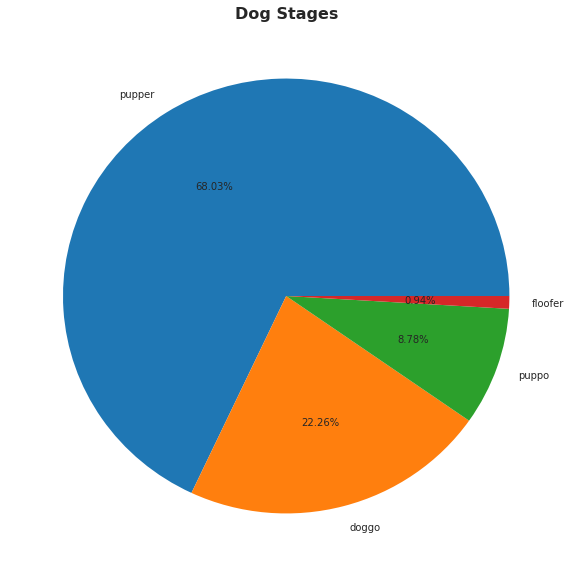

In [63]:
#make a Pie chart for dog stage counts
df_merge['dog_stage'].value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(10,10))

plt.ylabel('')
plt.title('Dog Stages', weight='bold', fontsize=16);

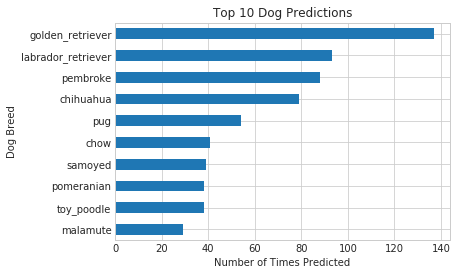

In [59]:
#Make a bar plot for top 10 dog breeds
df_master['p1'].value_counts()[9::-1].plot(kind='barh')
plt.title('Top 10 Dog Predictions')
plt.xlabel('Number of Times Predicted')
plt.ylabel('Dog Breed')
plt.fontsize = 12

68.40% of dogs are in pupper(young dogs) stages, it could be young dogs are more adorable or people tend to take pictures during times when they recently adopted a new puppy. Golden Retriever is the most predicted dog, Follow by Laborator retriever, pembroke, chihuahua, pug, etc.

In [60]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 2066
Data columns (total 23 columns):
tweet_id              1981 non-null object
timestamp             1981 non-null datetime64[ns]
source                1981 non-null object
text                  1981 non-null object
expanded_urls         1981 non-null object
rating_numerator      1981 non-null int64
rating_denominator    1981 non-null float64
name                  1348 non-null object
jpg_url               1981 non-null object
img_num               1981 non-null int64
p1                    1981 non-null object
p1_conf               1981 non-null float64
p1_dog                1981 non-null bool
p2                    1981 non-null object
p2_conf               1981 non-null float64
p2_dog                1981 non-null bool
p3                    1981 non-null object
p3_conf               1981 non-null float64
p3_dog                1981 non-null bool
favorite_count        1981 non-null int64
retweet_count         1981 non

## Resources

https://stackoverflow.com/questions/27060098/replacing-few-values-in-a-pandas-dataframe-column-with-another-value

https://stackoverflow.com/questions/27060098/replacing-few-values-in-a-pandas-dataframe-column-with-another-value

https://stackoverflow.com/questions/7353968/checking-if-first-letter-of-string-is-in-uppercase

https://stackoverflow.com/questions/47704798/python-pandas-drop-dataframe

https://stackoverflow.com/questions/50689823/pandas-drop-rows-vs-filter

https://stackoverflow.com/questions/13682044/pandas-dataframe-remove-unwanted-parts-from-strings-in-a-column

https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime

https://github.com/SThornewillvE/Udacity-Project---Data-Wrangling/blob/master/wrangling-act.ipynb

https://github.com/MrGeislinger/UdacityDAND_Proj_WrangleAndAnalyzeData/blob/master/wrangle_act.ipynb

